# Method defs EXPERT

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos). Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'methoddef__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('methoddefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-23 13:44:19.184964 Data cache files found ...
2024-05-23 13:44:19.204026 Data cache files successfully loaded!!
The dataset contains 35666 (38.63%) instances for BEGINNER class and 56658 (61.37%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached', 'methoddef__expertise_level', 'functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (56658, 20)
As we can see the downloaded data contains a total of 56658 instances. For each instance we have 20 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56658 entries, 7961 to 91906
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   methoddef__is_class_method               56658 non-null  bool   
 1   methoddef__is_static_method              56658 non-null  bool   
 2   methoddef__is_constructor_method         56658 non-null  bool   
 3   methoddef__is_abstract_method            56658 non-null  bool   
 4   methoddef__is_property                   56658 non-null  bool   
 5   methoddef__is_wrapper                    56658 non-null  bool   
 6   methoddef__is_cached                     56658 non-null  bool   
 7   methoddef__expertise_level               56658 non-null  object 
 8   functiondef__name_convention             56658 non-null  object 
 9   functiondef__number_of_characters        56658 non-null  int64  
 10  functiondef__is_magic                    56658 n

Cómo podemos ver la tabla está compuesta por 12 variables boleanas, 6 numéricas y 2 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [66.34%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

methoddef__is_class_method                 0
methoddef__is_static_method                0
methoddef__is_constructor_method           0
methoddef__is_abstract_method              0
methoddef__is_property                     0
methoddef__is_wrapper                      0
methoddef__is_cached                       0
methoddef__expertise_level                 0
functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,56658,2,False,54646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,56658,2,False,55479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,56658,2,False,49473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,56658,2,False,55871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,56658,2,False,53745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,56658,1,False,56658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,56658,1,False,56658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__expertise_level,56658,1,EXPERT,56658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__name_convention,56658,7,SnakeCase,42729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,56658.0,NaN,NaN,NaN,13.277189,8.357756,1.0,8.0,11.0,17.0,74.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 7
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 10), (10, 16), (16, inf)], # min: 1 ; max: 74
    "functiondef__body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(0.0, 2.0), (2.0, inf)], # min: 2 ; max: 7
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(full_table, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False  54646   96.448869
                       True   2012    3.551131

 methoddef__is_static_method  count  percentage
                       False  55479   97.919094
                        True   1179    2.080906

 methoddef__is_constructor_method  count  percentage
                            False  49473   87.318649
                             True   7185   12.681351

 methoddef__is_abstract_method  count  percentage
                         False  55871   98.610964
                          True    787    1.389036

 methoddef__is_property  count  percentage
                  False  53745   94.858625
                   True   2913    5.141375

 methoddef__is_wrapper  count  percentage
                 False  56658       100.0

 methoddef__is_cached  count  percentage
                False  56658       100.0

functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  262

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (56658, 26)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

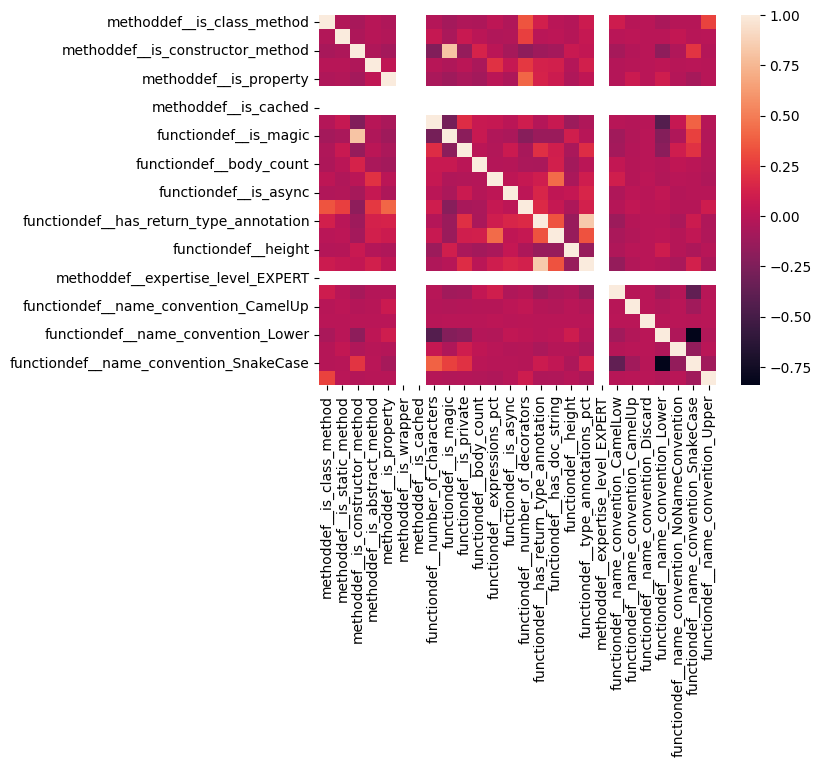

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 19 variable (12 booleanas, 4 numericas, 2 porcentuales y 1 categorica) se hara un analisis detallado

### Variable is_class_method (1/19)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

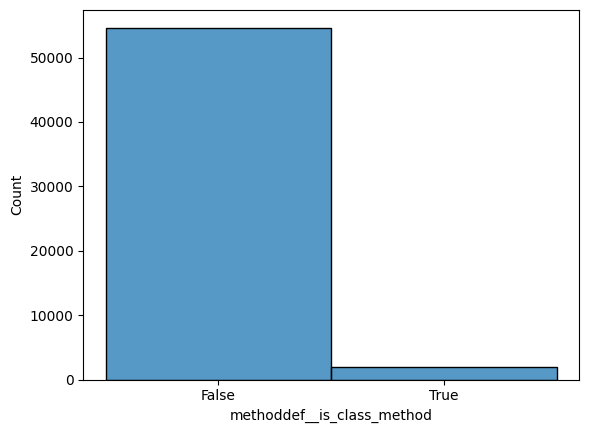

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [12]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 2012 valores verdaderos y 54646 valores falsos. Y, la desviación típica es de 0.18506988883018494
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.035511313495005116.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9644886865049949.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 96.45% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 3.551% de los items.


In [14]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2012.0,2012.0,2012.0,2012.000000,2012.0,2012.0,2012.0,2012.000000,2012.000000,2012.000000,...,2012.000000,2012.000000,2012.0,2012.000000,2012.0,2012.0,2012.000000,2012.000000,2012.000000,2012.000000
mean,1.0,0.0,0.0,0.007455,0.0,0.0,0.0,12.113320,0.006461,0.067594,...,2.032306,0.432871,1.0,0.143141,0.0,0.0,0.051193,0.000994,0.717197,0.087475
std,0.0,0.0,0.0,0.086043,0.0,0.0,0.0,4.594992,0.080142,0.251111,...,0.217234,0.323175,0.0,0.350304,0.0,0.0,0.220446,0.031520,0.450474,0.282600
min,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,11.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,13.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
max,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,41.000000,1.000000,1.000000,...,4.000000,1.000000,1.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_static_method (2/19)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='methoddef__is_static_method', ylabel='Count'>

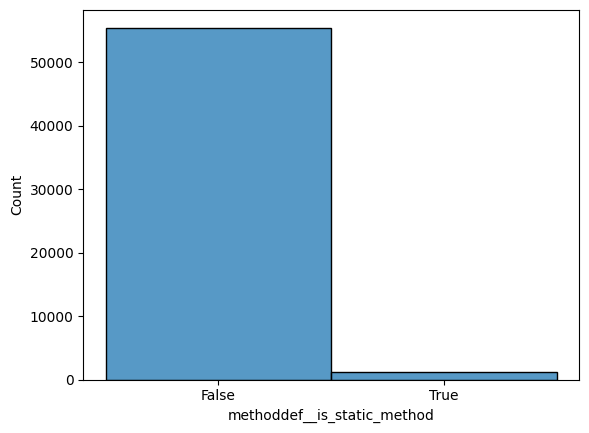

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 1179 valores verdaderos y 55479 valores falsos. Y, la desviación típica es de 0.1427459567785263
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.020809064915810655.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.9791909350841893.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 97.92% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 2.081% de los items.


In [18]:
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,1179.0,1179.0,1179.0,1179.000000,1179.0,1179.0,1179.0,1179.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.0,1179.000000,1179.000000,1179.0,1179.000000,1179.000000,1179.000000,1179.000000
mean,0.0,1.0,0.0,0.006785,0.0,0.0,0.0,16.279051,0.003393,0.309584,...,2.043257,0.419509,1.0,0.045802,0.008482,0.0,0.174724,0.033927,0.735369,0.001696
std,0.0,0.0,0.0,0.082129,0.0,0.0,0.0,8.929795,0.058173,0.462518,...,0.320221,0.477115,0.0,0.209143,0.091744,0.0,0.379892,0.181118,0.441324,0.041169
min,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,9.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,20.500000,0.000000,1.000000,...,2.000000,1.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,61.000000,1.000000,1.000000,...,6.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_constructor_method (3/19)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='methoddef__is_constructor_method', ylabel='Count'>

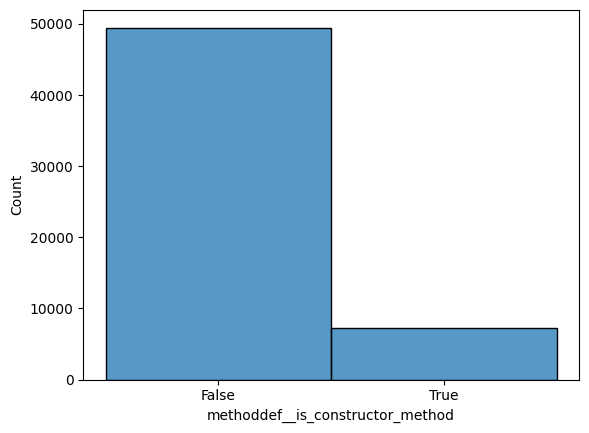

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_constructor_method contiene 7185 valores verdaderos y 49473 valores falsos. Y, la desviación típica es de 0.33276689052581787
La frecuencia con la que programa puede tener la variable is_constructor_method a True es 0.12681351265487661.
La frecuencia con la que programa puede tener la variable is_constructor_method a False es 0.8731864873451234.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 87.32% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 12.68% de los items.


In [22]:
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,7185.0,7185.0,7185.0,7185.000000,7185.0,7185.0,7185.0,7185.0,7185.0,7185.0,...,7185.000000,7185.000000,7185.0,7185.0,7185.0,7185.0,7185.0,7185.0,7185.0,7185.0
mean,0.0,0.0,1.0,0.000974,0.0,0.0,0.0,8.0,1.0,0.0,...,2.128323,0.325274,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.031200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.402817,0.370006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,2.000000,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,5.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_abstract_method (4/19)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

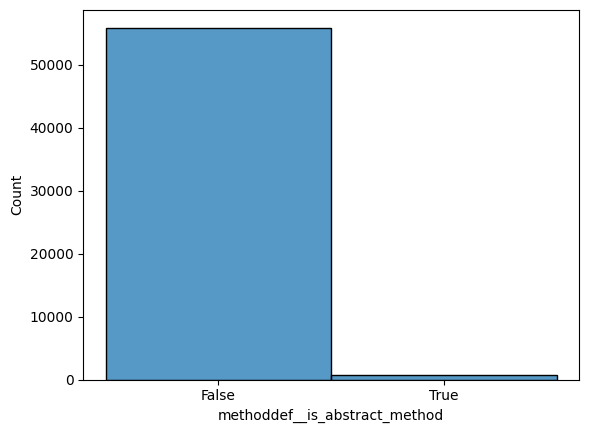

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 787 valores verdaderos y 55871 valores falsos. Y, la desviación típica es de 0.11703699827194214
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.013890359702072082.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 0.9861096402979279.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 98.61% de los items.
La variable methoddef__is_abstract_method toma el valor de 1.0 en un 1.389% de los items.


In [26]:
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,787.000000,787.000000,787.000000,787.0,787.000000,787.0,787.0,787.000000,787.000000,787.000000,...,787.0,787.000000,787.0,787.0,787.0,787.0,787.000000,787.0,787.000000,787.0
mean,0.019060,0.010165,0.008895,1.0,0.099111,0.0,0.0,12.565438,0.034307,0.149936,...,2.0,0.599440,1.0,0.0,0.0,0.0,0.249047,0.0,0.750953,0.0
std,0.136822,0.100373,0.093950,0.0,0.299000,0.0,0.0,6.585258,0.182134,0.357236,...,0.0,0.222301,0.0,0.0,0.0,0.0,0.432736,0.0,0.432736,0.0
min,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,2.000000,0.000000,0.000000,...,2.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.0,0.500000,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
50%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,2.0,0.666667,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,2.0,0.750000,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,45.000000,1.000000,1.000000,...,2.0,1.000000,1.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### Variable is_property (5/19)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

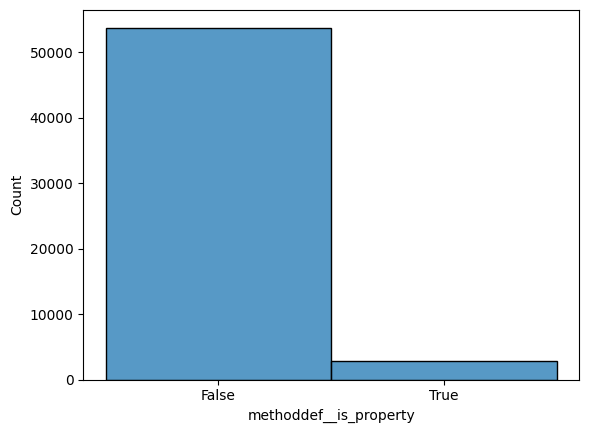

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 2913 valores verdaderos y 53745 valores falsos. Y, la desviación típica es de 0.22084209322929382
La frecuencia con la que programa puede tener la variable is_property a True es 0.05141374563168485.
La frecuencia con la que programa puede tener la variable is_property a False es 0.9485862543683151.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 94.86% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 5.141% de los items.


In [30]:
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2913.0,2913.0,2913.0,2913.000000,2913.0,2913.0,2913.0,2913.000000,2913.000000,2913.000000,...,2913.000000,2913.000000,2913.0,2913.000000,2913.000000,2913.0,2913.000000,2913.000000,2913.000000,2913.000000
mean,0.0,0.0,0.0,0.026777,1.0,0.0,0.0,10.935462,0.000343,0.059046,...,2.012702,0.328298,1.0,0.021627,0.022657,0.0,0.356334,0.000343,0.598696,0.000343
std,0.0,0.0,0.0,0.161457,0.0,0.0,0.0,5.821163,0.018528,0.235751,...,0.136843,0.238105,0.0,0.145488,0.148833,0.0,0.478998,0.018528,0.490247,0.018528
min,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,7.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,10.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,13.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
max,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,45.000000,1.000000,1.000000,...,4.000000,0.666667,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable is_wrapper (6/19)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

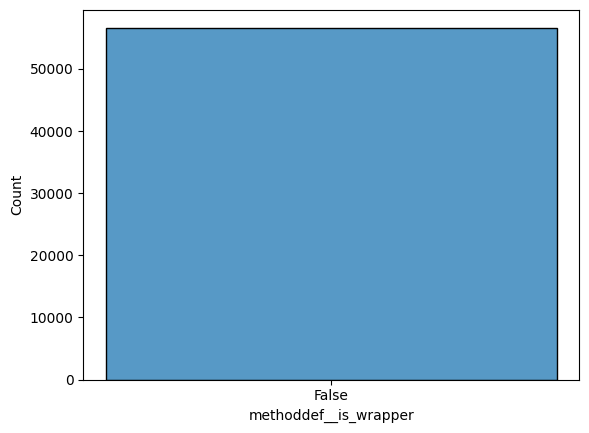

In [31]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [32]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 56658 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [33]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [34]:
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea wrapper.

### Variable is_cached (7/19)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

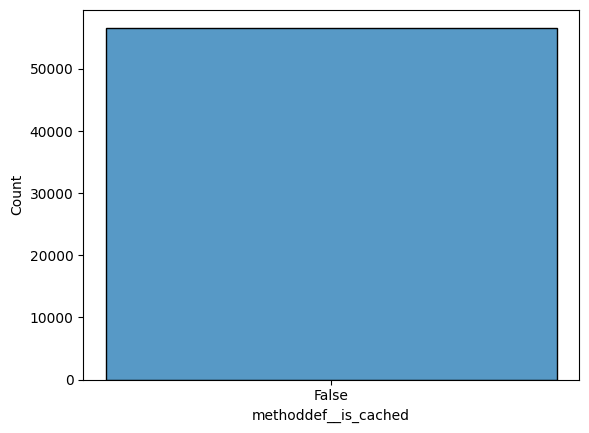

In [35]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [36]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 56658 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [37]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [38]:
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea cached.

### Variable is_private (8/19)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

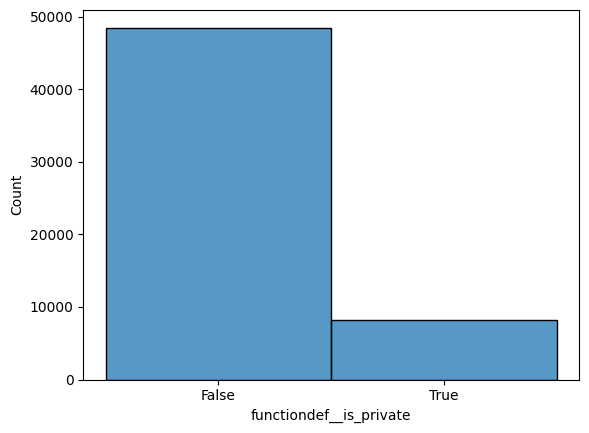

In [39]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [40]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 8179 valores verdaderos y 48479 valores falsos. Y, la desviación típica es de 0.35145482420921326
La frecuencia con la que programa puede tener la variable is_private a True es 0.14435737230399945.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8556426276960005.


In [41]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 85.56% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 14.44% de los items.


In [42]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,8179.000000,8179.000000,8179.0,8179.000000,8179.000000,8179.0,8179.0,8179.000000,8179.0,8179.0,...,8179.000000,8179.000000,8179.0,8179.0,8179.0,8179.0,8179.0,8179.000000,8179.000000,8179.0
mean,0.016628,0.044626,0.0,0.014427,0.021029,0.0,0.0,17.048294,0.0,1.0,...,2.018707,0.438330,1.0,0.0,0.0,0.0,0.0,0.030566,0.969434,0.0
std,0.127881,0.206495,0.0,0.119251,0.143491,0.0,0.0,7.001676,0.0,0.0,...,0.187705,0.328025,0.0,0.0,0.0,0.0,0.0,0.172149,0.172149,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0,1.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,12.000000,0.0,1.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,16.000000,0.0,1.0,...,2.000000,0.500000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,21.000000,0.0,1.0,...,2.000000,0.666667,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,54.000000,0.0,1.0,...,7.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable is_magic (9/19)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

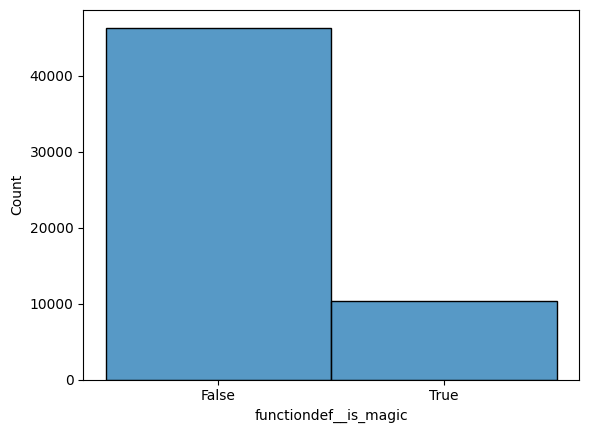

In [43]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [44]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 10348 valores verdaderos y 46310 valores falsos. Y, la desviación típica es de 0.38637426495552063
La frecuencia con la que programa puede tener la variable is_magic a True es 0.18263969783613965.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.8173603021638604.


In [45]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 81.74% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 18.26% de los items.


In [46]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.0,10348.0,10348.000000,10348.0,10348.0,...,10348.000000,10348.000000,10348.0,10348.0,10348.0,10348.0,10348.0,10348.0,10348.0,10348.0
mean,0.001256,0.000387,0.694337,0.002609,0.000097,0.0,0.0,8.128914,1.0,0.0,...,2.141863,0.282322,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.035423,0.019658,0.460710,0.051016,0.009830,0.0,0.0,1.075395,0.0,0.0,...,0.425320,0.350919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,8.000000,1.0,0.0,...,2.000000,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,28.000000,1.0,0.0,...,5.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (10/19)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

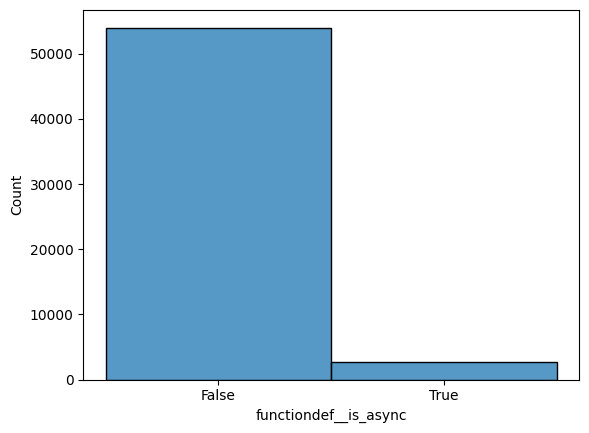

In [47]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [48]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 2647 valores verdaderos y 54011 valores falsos. Y, la desviación típica es de 0.2110380083322525
La frecuencia con la que programa puede tener la variable is_async a True es 0.046718909950933675.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9532810900490664.


In [49]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 95.33% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 4.672% de los items.


In [50]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.0,2647.0,2647.000000,2647.000000,2647.000000,...,2647.000000,2647.000000,2647.0,2647.000000,2647.000000,2647.0,2647.000000,2647.0,2647.000000,2647.0
mean,0.004156,0.002267,0.004533,0.042312,0.000378,0.0,0.0,13.499434,0.080091,0.268606,...,2.138270,0.518593,1.0,0.001133,0.007178,0.0,0.249339,0.0,0.742350,0.0
std,0.064342,0.047565,0.067191,0.201338,0.019437,0.0,0.0,8.099946,0.271485,0.443318,...,0.396219,0.321578,0.0,0.033653,0.084434,0.0,0.432712,0.0,0.437423,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000,1.000000,...,2.000000,0.750000,1.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,5.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Variable has_return_type_annotation (11/19)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

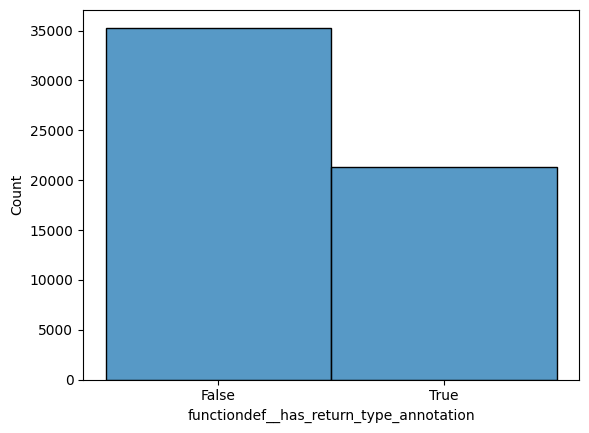

In [51]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [52]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 21360 valores verdaderos y 35298 valores falsos. Y, la desviación típica es de 0.48463889956474304
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.3769988351159589.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.6230011648840411.


In [53]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 62.3% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 37.7% de los items.


In [54]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,21360.000000,21360.000000,21360.000000,21360.000000,21360.000000,21360.0,21360.0,21360.000000,21360.000000,21360.000000,...,21360.000000,21360.000000,21360.0,21360.000000,21360.000000,21360.0,21360.000000,21360.000000,21360.000000,21360.0
mean,0.061891,0.020506,0.075983,0.032865,0.089419,0.0,0.0,13.011704,0.117603,0.234176,...,2.015965,0.650524,1.0,0.010955,0.002200,0.0,0.185346,0.001545,0.799953,0.0
std,0.240964,0.141725,0.264977,0.178288,0.285355,0.0,0.0,6.957642,0.322145,0.423493,...,0.149528,0.149750,0.0,0.104094,0.046858,0.0,0.388587,0.039276,0.400044,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.071429,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,0.000000,...,2.000000,0.750000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,5.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_doc_string (12/19)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

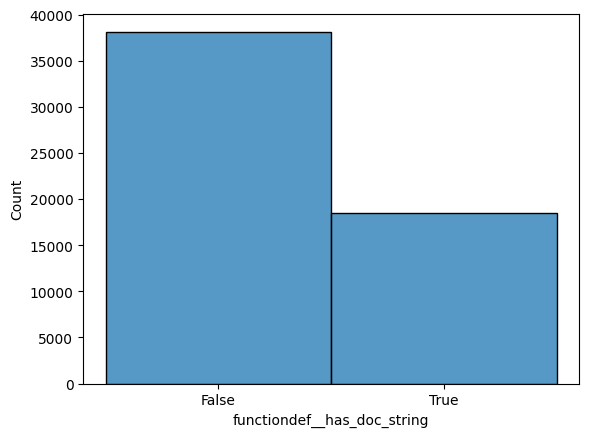

In [55]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [56]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 18482 valores verdaderos y 38176 valores falsos. Y, la desviación típica es de 0.46882662177085876
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.326202831021215.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6737971689787849.


In [57]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 67.38% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 32.62% de los items.


In [58]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,18482.000000,18482.000000,18482.000000,18482.000000,18482.000000,18482.0,18482.0,18482.000000,18482.000000,18482.000000,...,18482.000000,18482.000000,18482.0,18482.000000,18482.000000,18482.0,18482.000000,18482.000000,18482.000000,18482.000000
mean,0.035278,0.023158,0.083108,0.032572,0.078076,0.0,0.0,14.022509,0.111406,0.197111,...,2.007359,0.449268,1.0,0.023807,0.001028,0.0,0.192295,0.006222,0.776431,0.000216
std,0.184486,0.150408,0.276053,0.177519,0.268298,0.0,0.0,8.468323,0.314642,0.397827,...,0.102720,0.331834,0.0,0.152451,0.032047,0.0,0.394114,0.078638,0.416648,0.014710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.000000,0.000000,0.000000,...,2.000000,0.750000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,66.000000,1.000000,1.000000,...,5.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (13/19)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 74. Con una media de 13.2.

<Axes: ylabel='functiondef__number_of_characters'>

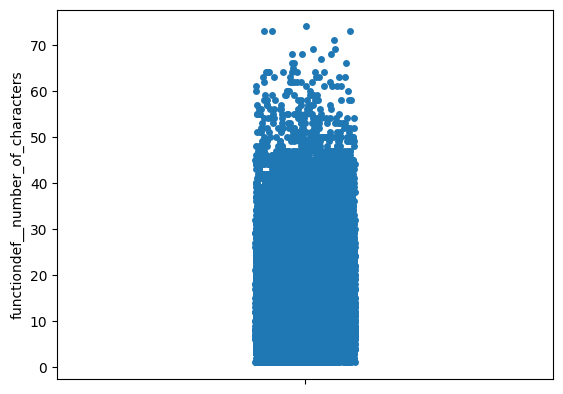

In [59]:
sns.stripplot(X['functiondef__number_of_characters'])

In [60]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6576507407236317
Rango valores atípicos extremos (Tukey): [-19.0,44.0]
Rango valores atípicos leves (Tukey): [-5.5,30.5]
Rango valores atípicos extremos (Fixed BoxPlot): [6.648909434120231,204.4088602068291]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -19.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -5.5 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 2499 instancias tienen un valor para functiondef__number_of_characters superior a 30.5 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 4.411% del total de instancias.
+3.0IQR: 432 instancias tienen un valor para functiondef__number_of_characters superior a 44.0 (Q3-3*IQR) para functiondef__number_of_characters. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 44.0 (Con un MC de 65 usamos Tuckey Extremo)

In [61]:
X[X['functiondef__number_of_characters'] > 44].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,432.0,432.000000,432.0,432.000000,432.000000,432.0,432.0,432.000000,432.0,432.000000,...,432.000000,432.000000,432.0,432.000000,432.0,432.0,432.0,432.000000,432.000000,432.0
mean,0.0,0.006944,0.0,0.002315,0.006944,0.0,0.0,51.261574,0.0,0.050926,...,2.004630,0.096208,1.0,0.027778,0.0,0.0,0.0,0.043981,0.928241,0.0
std,0.0,0.083140,0.0,0.048113,0.083140,0.0,0.0,6.173712,0.0,0.220101,...,0.096225,0.236889,0.0,0.164526,0.0,0.0,0.0,0.205292,0.258388,0.0
min,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,45.000000,0.0,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,46.000000,0.0,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,49.000000,0.0,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,55.000000,0.0,0.000000,...,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
max,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,74.000000,0.0,1.000000,...,4.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable body_count (14/19)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 364. Con una media de 3,98.

<Axes: ylabel='functiondef__body_count'>

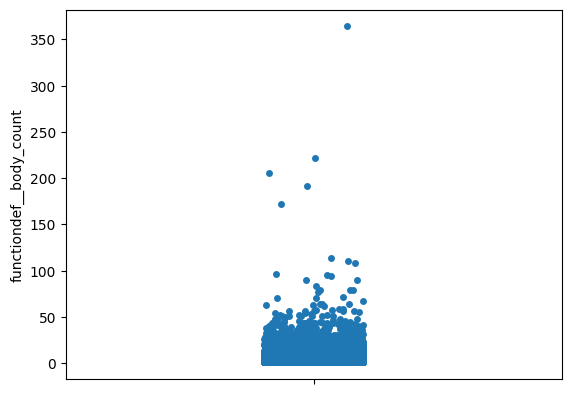

In [62]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [63]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5132406331155125
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.004572261915138709,51.745687322349404]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -11.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -5.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 2869 instancias tienen un valor para functiondef__body_count superior a 11.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.064% del total de instancias.
+3.0IQR: 1025 instancias tienen un valor para functiondef__body_count superior a 17.0 (Q3-3*IQR) para functiondef__body_count. Representando un 1.809% del total de instancias.
L: 0 instancias tienen un val

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 51.7 (Con un MC de 0.51 usamos U)

In [64]:
X[X['functiondef__body_count'] > 51.7].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,44.0,44.000000,44.000000,44.0,44.0,44.0,44.0,44.000000,44.000000,44.000000,...,44.0,44.000000,44.0,44.000000,44.0,44.0,44.000000,44.000000,44.000000,44.0
mean,0.0,0.045455,0.340909,0.0,0.0,0.0,0.0,14.750000,0.340909,0.159091,...,2.0,0.115996,1.0,0.159091,0.0,0.0,0.045455,0.090909,0.704545,0.0
std,0.0,0.210707,0.479495,0.0,0.0,0.0,0.0,10.202884,0.479495,0.369989,...,0.0,0.296800,0.0,0.369989,0.0,0.0,0.210707,0.290803,0.461522,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,2.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,2.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.000000,0.000000,0.000000,...,2.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
75%,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,21.000000,1.000000,0.000000,...,2.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0
max,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,47.000000,1.000000,1.000000,...,2.0,0.948276,1.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


### Variable number_of_decorators (15/19)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 7. Con una media de 0.22.

<Axes: ylabel='functiondef__number_of_decorators'>

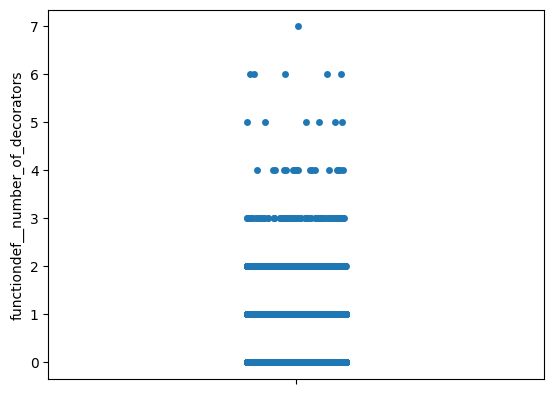

In [65]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [66]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7416218549680426
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 11845 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 20.91% del total de instancias.
+3.0IQR: 11845 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 20.91% del total de i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [67]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.0,11845.0,11845.000000,11845.000000,11845.000000,...,11845.000000,11845.000000,11845.0,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000
mean,0.169861,0.099536,0.003546,0.066442,0.245927,0.0,0.0,14.368932,0.013423,0.095399,...,2.037569,0.377606,1.0,0.038497,0.007260,0.000084,0.210806,0.005994,0.722077,0.015281
std,0.375526,0.299393,0.059443,0.249063,0.430653,0.0,0.0,8.751513,0.115084,0.293778,...,0.234676,0.335390,0.0,0.192402,0.084902,0.009188,0.407898,0.077192,0.447994,0.122672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,74.000000,1.000000,1.000000,...,6.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable height (16/19)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 7. Con una media de 2.07.

<Axes: ylabel='functiondef__height'>

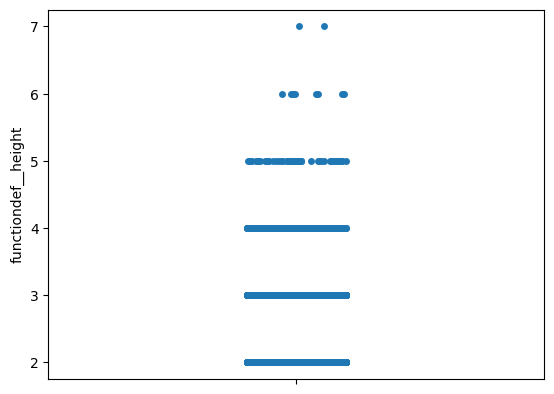

In [68]:
sns.stripplot(X['functiondef__height'])

In [69]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 3251 instancias tienen un valor para functiondef__height superior a 2.0 (Q3+1.5*IQR) para functiondef__height. Representando un 5.738% del total de instancias.
+3.0IQR: 3251 instancias tienen un valor para functiondef__height superior a 2.0 (Q3-3*IQR) para functiondef__height. Representando un 5.738% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 2.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Todos los umbrales son 2)

In [70]:
X[X['functiondef__height'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,3251.000000,3251.000000,3251.000000,3251.0,3251.000000,3251.0,3251.0,3251.000000,3251.000000,3251.000000,...,3251.000000,3251.000000,3251.0,3251.000000,3251.000000,3251.0,3251.000000,3251.000000,3251.000000,3251.000000
mean,0.015072,0.008613,0.231006,0.0,0.008613,0.0,0.0,8.669024,0.363273,0.033836,...,3.247616,0.078341,1.0,0.003076,0.002153,0.0,0.337742,0.003384,0.653030,0.000615
std,0.121859,0.092419,0.421541,0.0,0.092419,0.0,0.0,5.028469,0.481016,0.180834,...,0.488536,0.200636,0.0,0.055385,0.046360,0.0,0.473013,0.058079,0.476079,0.024799
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,3.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,0.000000,0.000000,...,3.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,3.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,9.000000,1.000000,0.000000,...,3.000000,0.000000,1.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,46.000000,1.000000,1.000000,...,7.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable expressions_pct (17/19)
Esta variable representa la proporción de las sentencias en el root de la funcsion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.23.

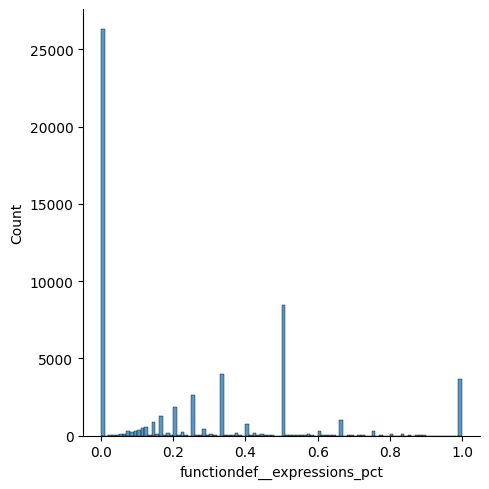

In [71]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [72]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4729832857847214
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.14325578035281655,5.474132933447841]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.5 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.75 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 1.25 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 2.0 (Q3-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
L:

In [73]:
X[X['functiondef__expressions_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,30366.000000,30366.000000,30366.000000,30366.000000,30366.000000,30366.0,30366.0,30366.000000,30366.000000,30366.000000,...,30366.000000,30366.000000,30366.0,30366.000000,30366.000000,30366.000000,30366.000000,30366.000000,30366.000000,30366.000000
mean,0.032536,0.017651,0.158598,0.021636,0.048344,0.0,0.0,13.863465,0.188961,0.150860,...,2.031022,0.346394,1.0,0.057696,0.001712,0.000033,0.163571,0.008562,0.768261,0.000165
std,0.177423,0.131683,0.365307,0.145494,0.214495,0.0,0.0,8.793974,0.391484,0.357918,...,0.211693,0.347396,0.0,0.233172,0.041347,0.005739,0.369892,0.092137,0.421950,0.012831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,73.000000,1.000000,1.000000,...,6.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Importante
El 46% de los metodos no tienen expresiones.

### Variable type_annotations_pct (18/19)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.28.

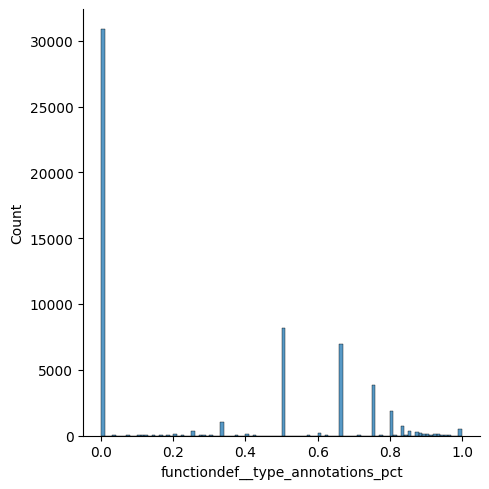

In [74]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [75]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3766757547855377
Rango valores atípicos extremos (Tukey): [-2.0000000596046448,2.6666667461395264]
Rango valores atípicos leves (Tukey): [-1.0000000298023224,1.666666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.26757239548167894,5.178497646487668]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -2.0000000596046448 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.0000000298023224 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 1.666666716337204 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functionde

In [76]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_EXPERT,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,25790.000000,25790.000000,25790.000000,25790.000000,25790.000000,25790.0,25790.0,25790.000000,25790.000000,25790.000000,...,25790.000000,25790.000000,25790.0,25790.000000,25790.000000,25790.0,25790.000000,25790.000000,25790.000000,25790.0
mean,0.053432,0.020706,0.130748,0.027879,0.074060,0.0,0.0,12.779410,0.170454,0.211710,...,2.022257,0.634520,1.0,0.009267,0.002055,0.0,0.178364,0.001357,0.808957,0.0
std,0.224897,0.142400,0.337131,0.164629,0.261873,0.0,0.0,6.991201,0.376038,0.408528,...,0.176702,0.162655,0.0,0.095821,0.045287,0.0,0.382826,0.036815,0.393130,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,2.000000,0.033333,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,2.000000,0.500000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,2.000000,0.666667,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,0.000000,...,2.000000,0.750000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,5.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Importante
El 54% de los metodos no tienen anotaciones de tipo.

### Variable name_convention (19/19)
Esta variable es de tipo categórica y representa la name_convention del nombre del método.

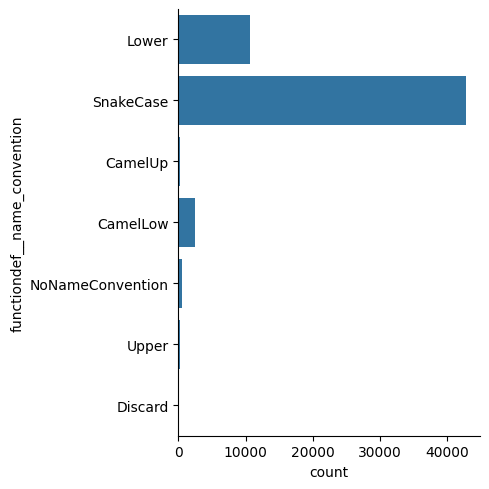

In [77]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [78]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 75.42% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 18.67% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 4.398% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 0.826% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.3495% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.3371% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.001765% de los items. [OUTLIER]


### IMPORTANTE
Dicard es outlier.

## Multivariate

TODO: isolation forest algorithm

In [79]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct
17695,False,True,False,False,False,False,False,EXPERT,CamelLow,9,False,False,56,0.017857,False,2,False,True,2,0.00
20825,False,False,False,True,True,False,False,EXPERT,Lower,3,False,False,1,1.000000,False,2,True,True,2,0.50
26060,False,False,False,True,True,False,False,EXPERT,SnakeCase,25,False,False,2,1.000000,False,2,True,True,2,0.50
27076,False,False,False,True,True,False,False,EXPERT,Lower,8,False,False,1,1.000000,False,2,True,True,2,0.50
27177,False,False,False,True,False,False,False,EXPERT,Lower,5,False,False,1,1.000000,True,1,True,True,2,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90410,False,True,False,False,False,False,False,EXPERT,NoNameConvention,13,True,False,36,0.000000,False,1,False,False,2,0.00
90476,False,True,False,False,False,False,False,EXPERT,NoNameConvention,23,True,False,5,0.000000,False,1,False,False,2,0.00
90521,False,True,False,False,False,False,False,EXPERT,NoNameConvention,16,True,False,10,0.100000,False,1,False,True,2,0.00
90601,False,True,False,False,False,False,False,EXPERT,NoNameConvention,9,True,False,5,0.200000,False,1,False,True,2,0.00


### IMPORTANTE
Hay que analizar los 67 los outliers de la tabla.